In [2]:
from google.colab import files
uploaded = files.upload()

Saving Engg_College_Data.csv to Engg_College_Data.csv


Датасет: https://www.kaggle.com/ankitverma2010/clustering-engineering-college-data

Ваша задача применив кластеризацию сгруппировать похожих игроков в кластеры.

Задание:

Загрузить датасет в DataFrame
Исследуйте данные:
размерность данных
типы переменных в данных
есть ли пропуски в данных? если да, то удалите их
Выберете переменные которые решили взять в качестве признаков для кластеризации. Объясните почему именно эти признаки взяли для кластеризации
Подберите число кластеров с помощью метода локтя, график визуалиции обязательно приведите. Объясните почему взяли именно это число кластеров.
Разбейте объекты на кластеры с помощью метода kmeans и создайте в датасете новую колонку в которую запишете кластер, в который попал ваш игрок. Сделайте вывод чем похожи игроки внутри класеров или по какому принципу организовались данные кластеры.
Выберете любые два признака и проведите по ним кластеризацию, визуализируйте полученные кластеры (берем всего 2 признака, чтобы была возможность визуализации кластеров в двумерном пространстве).

In [3]:
import pandas as pd

engg = pd.read_csv('Engg_College_Data.csv')
engg

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5
5,6,F,3,4,3,3,4
6,7,G,1,3,1,1,2
7,8,H,4,4,5,5,5
8,9,I,4,4,4,4,4
9,10,J,3,4,3,4,5


In [5]:
X = engg.loc[:,['Teaching','Internship']]
y = engg['SR_NO']

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

Y_pred = kmeans.labels_
Y_pred

array([1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2], dtype=int32)

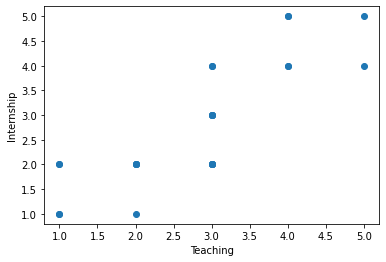

In [9]:
import matplotlib.pyplot as plt

plt.scatter(engg['Teaching'],engg['Internship'])
plt.xlabel('Teaching')
plt.ylabel('Internship')
plt.show()

In [10]:
X['cluster'] = Y_pred
X

,Teaching,Internship,cluster
0,5,5,1
1,4,5,1
2,4,4,1
3,5,4,1
4,2,2,0
5,3,3,2
6,1,1,0
7,4,5,1
8,4,4,1
9,3,4,1


In [11]:
X[X['cluster']==0]

,Teaching,Internship,cluster
4,2,2,0
6,1,1,0
11,2,2,0
12,1,2,0
20,2,2,0
21,2,2,0
22,2,1,0
23,1,2,0
24,1,1,0


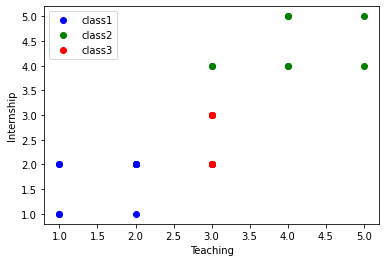

In [12]:
import matplotlib.pyplot as plt

plt.plot(X[X['cluster']==0]['Teaching'], X[X['cluster']==0]['Internship'], 'bo', label='class1')

plt.plot(X[X['cluster']==1]['Teaching'], X[X['cluster']==1]['Internship'], 'go', label='class2')

plt.plot(X[X['cluster']==2]['Teaching'], X[X['cluster']==2]['Internship'], 'ro', label='class3')

plt.xlabel('Teaching')
plt.ylabel('Internship')
plt.legend(loc=0)
plt.show()

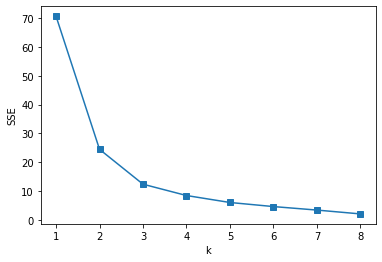

In [14]:
X = engg.loc[:,['Teaching','Internship']]

SSE = []

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) 
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
Y_pred = kmeans.labels_
Y_pred

array([0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2], dtype=int32)